<a href="https://colab.research.google.com/github/AkashSingh993/Medical-Charges-Prediction/blob/main/GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [ ]:
# loading the data from csv file to Pandaa DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows of the data frame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of Rows and Column
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting some information about the Dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
*  Sex
*  Smoker
*  Region








In [ ]:
# checking for Missing Values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# statistical Measures of the Dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

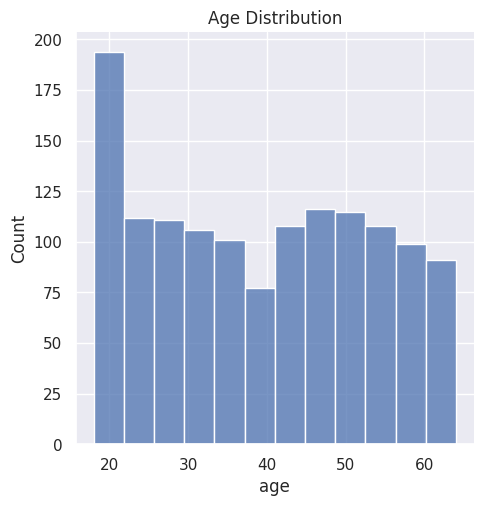

In [ ]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

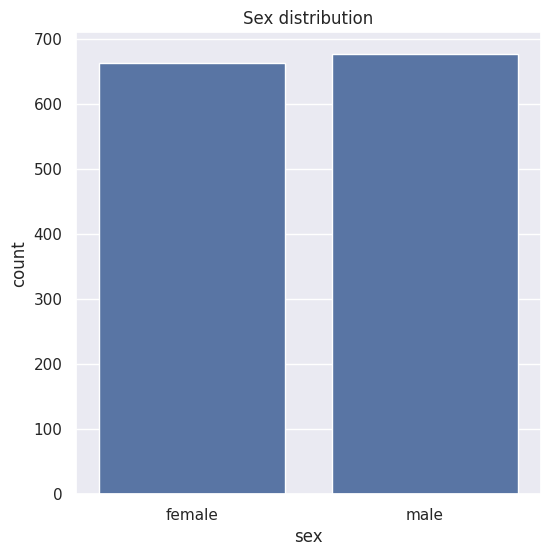

In [ ]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex' , data=insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

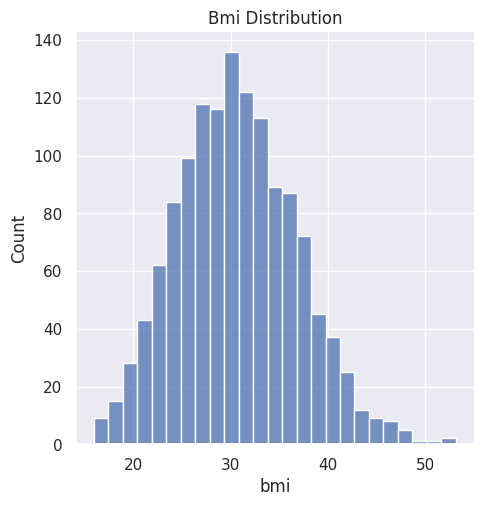

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('Bmi Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9


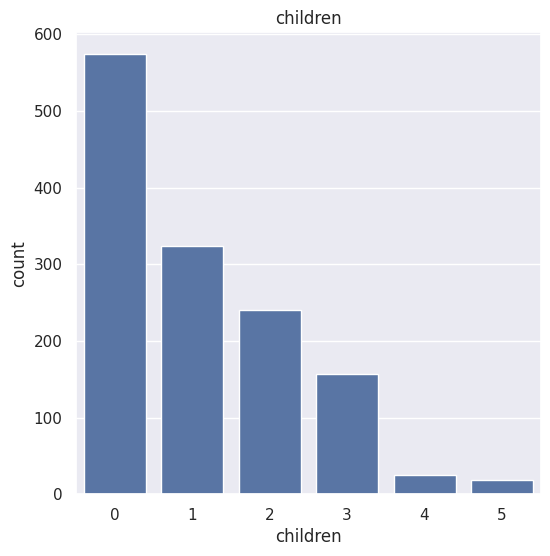

In [ ]:
# Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children' , data=insurance_dataset)
plt.title('children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

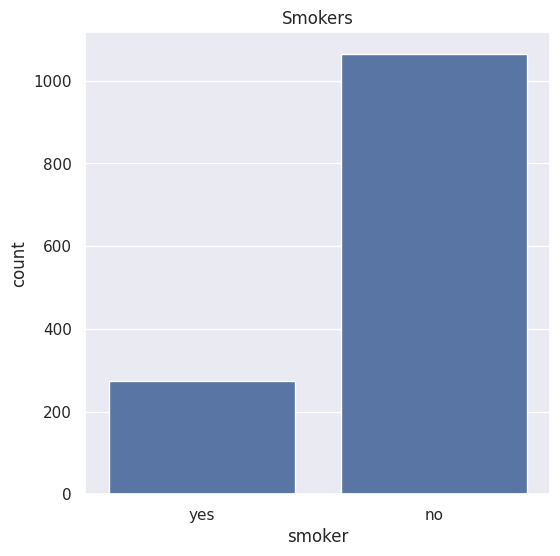

In [ ]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data=insurance_dataset)
plt.title('Smokers')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

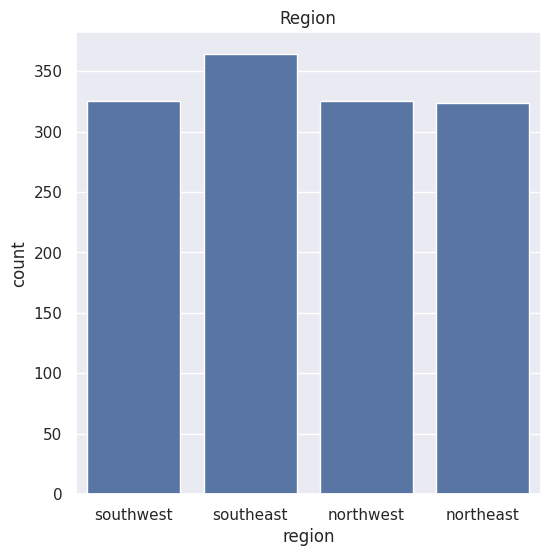

In [ ]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data=insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

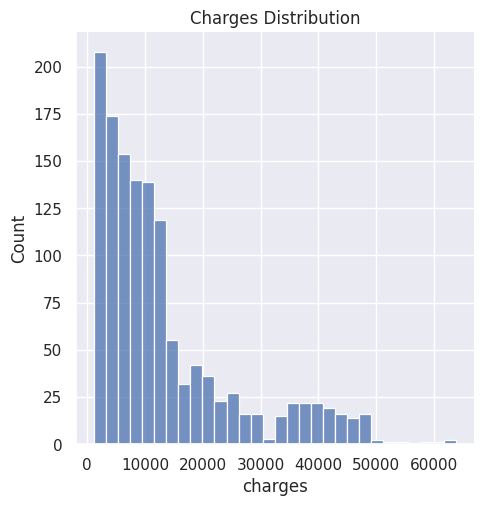

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0 , 'female':1}}, inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'no':0 , 'yes':1}}, inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0 ,'southwest':1 ,'northeast':2 ,'northwest':3}}, inplace=True)

Splitting the Features and Targets

In [ ]:
X=insurance_dataset.drop(columns='charges' , axis=1)
Y=insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the Data into Training and Testing Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training- Linear Regression

In [ ]:
# loading the linear regression model
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# predictions on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ' , r2_train)

R squared value :  0.751505643411174


In [ ]:
# predictions on testing data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ' , r2_test)

R squared value :  0.7447273869684076


Building a Predictive System

In [ ]:
input_data = (31,1,25.74,0,0,0)

# changing input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ' , prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
